# Syriatel Customer Churn

### Authors
* Tony Bai
* Arthur Kim
* Eddie Lin
* Douglas Lu

## Overview

## Business Problem

## Data Understanding

## Import

In [1]:
#import relevant libraries
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, plot_confusion_matrix

## Reviewing the Data File

In [2]:
#since the indiviudal notebook is in separate folder, had to move filepath one up and then import file

In [3]:
cd ..

/Users/douglasgreg/Phase_3_Project_week/SyriaTel_Customer_Churn


In [4]:
#read in the file
df = pd.read_csv('data/syriatel_customer_churn.csv')

In [5]:
#review the first five entires in the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Cleaning the Data

After reviewing the dataset, we already see some interesting columns and also certain aspects that need to be modified. We see that the 'churn' column will be our target and needs to be converted into 0s and 1s. We also see that phone number is already split into the area code and the remaining seven numbers. For this project, we deemed that the area code may be more relevant for the project. We also noticed that the column names have spaces, which we will have to replace with underscores.

In [7]:
#convert the target 'churn' to 0s and 1s
df['churn'] = df['churn'].astype(int)

In [8]:
#replace the space in column names with underscores
df.columns = df.columns.str.replace(' ','_')

In [9]:
#drop the phone number column as it is not relevant for our model
df.drop('phone_number', axis=1, inplace=True)

In [10]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


We noticed that some of the numeric columns were similar and can be summed to create new total columns. We created a total domestic minutes, calls, and charge columns that does not include international calls and separate total columns that do not include international calls. Charge per minute and the proportion of international calls may also play as factors for churn. We also created a customer call satisfaction column by taking the ratio of customer service calls to total calls, so that we can highlight customers who had a high volume of customer service calls relative to their total volume of calls. 

In [11]:
df['total_minutes_dom'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']

In [12]:
df['total_calls_dom'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']

In [13]:
df['total_charge_dom'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] #total_day_charge

In [14]:
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']

In [15]:
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls']

In [16]:
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge'] #total day charge

In [17]:
df["charge_per_min_dom"] = df['total_charge_dom']/df['total_calls_dom']

In [18]:
df["charge_per_min_int"] = df['total_intl_charge']/df['total_intl_calls']

In [19]:
df["%_int_min"]= df['total_intl_minutes']/ df['total_minutes']

In [20]:
df['call_satisfaction'] = df['customer_service_calls']/df['total_calls']

In [21]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_minutes_dom,total_calls_dom,total_charge_dom,total_minutes,total_calls,total_charge,charge_per_min_dom,charge_per_min_int,%_int_min,call_satisfaction
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,707.2,300,72.86,717.2,303,75.56,0.242867,0.900000,0.013943,0.003300
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,611.5,329,55.54,625.2,332,59.24,0.168815,1.233333,0.021913,0.003012
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,527.2,328,59.00,539.4,333,62.29,0.179878,0.658000,0.022618,0.000000
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,558.2,248,65.02,564.8,255,66.80,0.262177,0.254286,0.011686,0.007843
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,501.9,356,49.36,512.0,359,52.09,0.138652,0.910000,0.019727,0.008357


In [22]:
#check if there are any nulls in the new columns we made
df.isnull().sum()

state                      0
account_length             0
area_code                  0
international_plan         0
voice_mail_plan            0
number_vmail_messages      0
total_day_minutes          0
total_day_calls            0
total_day_charge           0
total_eve_minutes          0
total_eve_calls            0
total_eve_charge           0
total_night_minutes        0
total_night_calls          0
total_night_charge         0
total_intl_minutes         0
total_intl_calls           0
total_intl_charge          0
customer_service_calls     0
churn                      0
total_minutes_dom          0
total_calls_dom            0
total_charge_dom           0
total_minutes              0
total_calls                0
total_charge               0
charge_per_min_dom         0
charge_per_min_int        18
%_int_min                  0
call_satisfaction          0
dtype: int64

In [23]:
#we see that there are nulls in charge_per_min_int, which are most liley due to dividing by 0, so we just fillna with 0
df['charge_per_min_int'].fillna(0, inplace=True)

Thinking ahead of when we need to split out our categorical features, we decided to categorize the 'state' column into regions to create fewer categories rather can splitting out all 50 states and DC.

In [24]:
df['state'].nunique()

51

In [25]:
states = {
        'AK': 'West',
        'AL': 'South',
        'AR': 'South',
        'AZ': 'West',
        'CA': 'West',
        'CO': 'West',
        'CT': 'Northeast',
        'DC': 'south',
        'DE': 'South',
        'FL': 'South',
        'GA': 'South',
        'HI': 'West',
        'IA': 'Midwest',
        'ID': 'West',
        'IL': 'Midwest',
        'IN': 'Midwest',
        'KS': 'Midwest',
        'KY': 'South',
        'LA': 'South',
        'MA': 'Northeast',
        'MD': 'South',
        'ME': 'Northeast',
        'MI': 'Midwest',
        'MN': 'Midwest',
        'MO': 'Midwest',
        'MS': 'South',
        'MT': 'West',
        'NC': 'South',
        'ND': 'Midwest',
        'NE': 'Midwest',
        'NH': 'Northeast',
        'NJ': 'Northeast',
        'NM': 'West',
        'NV': 'West',
        'NY': 'Northeast',
        'OH': 'Midwest',
        'OK': 'South',
        'OR': 'West',
        'PA': 'Northeast',
        'RI': 'Northeast',
        'SC': 'South',
        'SD': 'Midwest',
        'TN': 'South',
        'TX': 'South',
        'UT': 'West',
        'VA': 'South',
        'VT': 'Northeast',
        'WA': 'West',
        'WI': 'Midwest',
        'WV': 'South',
        'WY': 'West'
}

In [26]:
df['region'] = df['state'].replace(states)
df.drop('state', axis=1, inplace=True)

In [27]:
df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_calls_dom,total_charge_dom,total_minutes,total_calls,total_charge,charge_per_min_dom,charge_per_min_int,%_int_min,call_satisfaction,region
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,...,300,72.86,717.2,303,75.56,0.242867,0.900000,0.013943,0.003300,Midwest
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,...,329,55.54,625.2,332,59.24,0.168815,1.233333,0.021913,0.003012,Midwest
2,137,415,no,no,0,243.4,114,41.38,121.2,110,...,328,59.00,539.4,333,62.29,0.179878,0.658000,0.022618,0.000000,Northeast
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,...,248,65.02,564.8,255,66.80,0.262177,0.254286,0.011686,0.007843,Midwest
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,...,356,49.36,512.0,359,52.09,0.138652,0.910000,0.019727,0.008357,South


## Exploratory Data Analysis (EDA)

In the exploratory data analysis (EDA) portion, we explored the target (churn) and the features included in the dataset

In [28]:
df_cont = df.select_dtypes(include=np.number).drop('area_code', axis=1)
df_cat = df[['churn', 'area_code', 'international_plan', 'voice_mail_plan', 'region']]

In [29]:
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   number_vmail_messages   3333 non-null   int64  
 2   total_day_minutes       3333 non-null   float64
 3   total_day_calls         3333 non-null   int64  
 4   total_day_charge        3333 non-null   float64
 5   total_eve_minutes       3333 non-null   float64
 6   total_eve_calls         3333 non-null   int64  
 7   total_eve_charge        3333 non-null   float64
 8   total_night_minutes     3333 non-null   float64
 9   total_night_calls       3333 non-null   int64  
 10  total_night_charge      3333 non-null   float64
 11  total_intl_minutes      3333 non-null   float64
 12  total_intl_calls        3333 non-null   int64  
 13  total_intl_charge       3333 non-null   float64
 14  customer_service_calls  3333 non-null   

In [30]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   churn               3333 non-null   int64 
 1   area_code           3333 non-null   int64 
 2   international_plan  3333 non-null   object
 3   voice_mail_plan     3333 non-null   object
 4   region              3333 non-null   object
dtypes: int64(2), object(3)
memory usage: 130.3+ KB


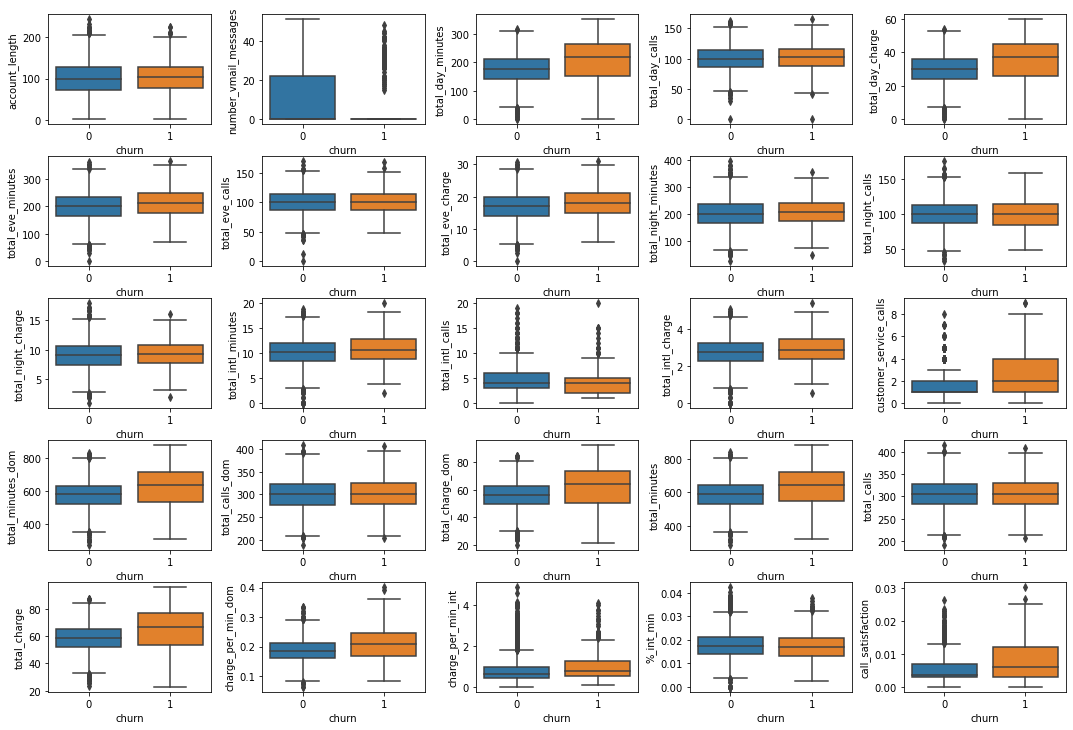

In [31]:
fig, ax = plt.subplots(5, 5, figsize=(15, 10))
fig.tight_layout()
for variable, subplot in zip(df_cont.drop('churn', axis=1).columns, ax.flatten()):
    sns.boxplot(x=df_cont['churn'], y=df_cont[variable],ax=subplot);

In [32]:
df_cat.groupby('churn').count()


,area_code,international_plan,voice_mail_plan,region
churn,,,,
0,2850,2850,2850,2850
1,483,483,483,483


<AxesSubplot:xlabel='region'>

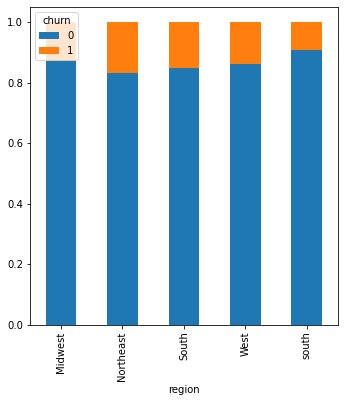

In [33]:
new_df = df[['churn', 'region']]
df_pct = (new_df.groupby(['region', 'churn'])['region'].count()/new_df.groupby(['region'])['region'].count())
fig, ax = plt.subplots(figsize=(5, 5))
fig.tight_layout()
df_pct.unstack().plot.bar(stacked=True, ax=ax)

# Functions

Model 1: Baseline Logistic Regression

In [34]:
X = df.drop(columns = ['churn'], axis = 1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
#one hot encoding
ohe = OneHotEncoder(sparse=False, handle_unknown='error', drop='first') 
categorical = ['area_code', 'international_plan', 'voice_mail_plan', 'region']

#Fitting object onto test and trasnforming test and train
X_train_ohe = ohe.fit_transform(X_train[categorical])
X_test_ohe = ohe.transform(X_test[categorical])

#placing column names onto our new categorical columns and formatting as df
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(categorical), 
                              index=X_train.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(categorical),
                            index=X_test.index)

#combining categoricals with rest of data
X_train = pd.concat([X_train.drop(categorical, axis=1), X_train_ohe_df],axis=1)
X_test = pd.concat([X_test.drop(categorical, axis=1), X_test_ohe_df], axis=1)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled.columns = X_train.columns
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_test_scaled.columns = X_test.columns

In [36]:
X_test_scaled.isnull().sum().sum()

0

In [37]:
logreg_baseline = LogisticRegression(random_state=42)

logreg_baseline.fit(X_train_scaled, y_train)

logreg_baseline_cv = cross_val_score(logreg_baseline, X_train_scaled, y_train).mean()
print(logreg_baseline_cv)

0.8636893328799479


In [38]:
print(logreg_baseline.score(X_train_scaled, y_train))
print(logreg_baseline.score(X_test_scaled, y_test))

0.8658379768538362
0.865


In [39]:
y_train_preds = logreg_baseline.predict(X_train_scaled)
y_test_preds = logreg_baseline.predict(X_test_scaled)

In [40]:
print(classification_report(y_train, y_train_preds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1993
           1       0.60      0.24      0.34       340

    accuracy                           0.87      2333
   macro avg       0.74      0.60      0.63      2333
weighted avg       0.84      0.87      0.84      2333



In [41]:
print(confusion_matrix(y_train, y_train_preds))

[[1940   53]
 [ 260   80]]


<AxesSubplot:xlabel='churn', ylabel='count'>

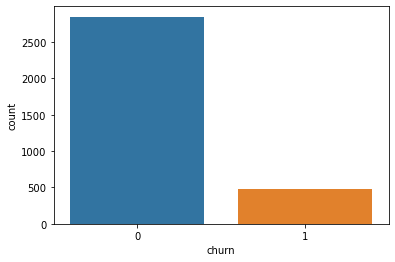

In [42]:
sns.countplot(x = 'churn', data = df)

<AxesSubplot:>

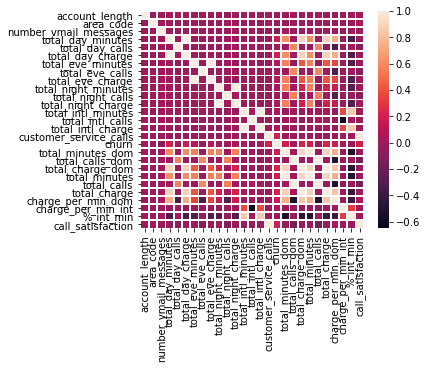

In [43]:
corr = df.corr()

fig = plt.figure(figsize = (5,4))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 0.75)

# Decision Tree Model ##DOUG'S CODE STARTS HERE

In [101]:
#Instantiate a Decision Tree and perform 3-fold cross-validaiton on training data

DT_clf = DecisionTreeClassifier() 

DT_cv_score = cross_val_score(DT_clf, X_train_scaled, y_train, cv=3)

mean_DT_cv_score = np.mean(DT_cv_score)

print(f"Mean Cross Val Score: {mean_DT_cv_score:.2%}")

#Model did extremly well, perhaps a bit too well. We should take a look for any imbalances. 

Mean Cross Val Score: 94.34%


In [102]:
#Create grid search parameters and intantiate GridSearch CV. Create different parameters and then fit the data. 

DT_clf = DecisionTreeClassifier() 

param_grid = { 
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 15, 2), #step up even higher 
    'min_samples_split': np.arange(5, 120, 5),
    'min_samples_leaf': np.arange(5, 120,5)
    }

gs_DT_clf = GridSearchCV(DT_clf, param_grid = param_grid, n_jobs = -1, scoring = "recall", cv = 5)

gs_DT_clf.fit(X_train_scaled, y_train)
    
#SPECIFCY SCORING IN GRIDSEARCH TO RECALL? CURRENTLY ON ACCURACY: scoring = 'recall',  

#consistency in paramgrid search rationale 
#random CV search 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11, 13]),
                         'min_samples_leaf': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115]),
                         'min_samples_split': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115])},
             scoring='recall')

In [103]:
#Identify the model's best parameters 

gs_DT_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [104]:
#Score the model on training data

gs_DT_clf.score(X_train_scaled, y_train)

0.8441176470588235

In [105]:
#Score the model on testing data

gs_DT_clf.score(X_test_scaled, y_test)

0.8881118881118881

In [106]:
print(f"Our accuracy for grid-search decision tree training model is:", gs_DT_clf.score(X_train_scaled, y_train))
print(f"Our accuracy for grid-search decision tree testing model is:", gs_DT_clf.score(X_test_scaled, y_test))


# Our accuracy for grid-search decision tree training model is: 0.9729961423060437
# Our accuracy for grid-search decision tree testing model is: 0.981

Our accuracy for grid-search decision tree training model is: 0.8441176470588235
Our accuracy for grid-search decision tree testing model is: 0.8881118881118881


In [107]:
#Create test and train predictions

y_train_preds = gs_DT_clf.predict(X_train_scaled)
y_test_preds = gs_DT_clf.predict(X_test_scaled)

In [108]:
#performance metrics 

print('Accuracy:', accuracy_score(y_test, y_test_preds))
print('Recall:', recall_score(y_test, y_test_preds))
print('F1 Score:', f1_score(y_test, y_test_preds))
print('Precision:', precision_score(y_test, y_test_preds))

Accuracy: 0.983
Recall: 0.8881118881118881
F1 Score: 0.9372693726937269
Precision: 0.9921875


In [109]:
#Create classification reports 

print(classification_report(y_train, y_train_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1993
           1       0.99      0.84      0.91       340

    accuracy                           0.98      2333
   macro avg       0.98      0.92      0.95      2333
weighted avg       0.98      0.98      0.97      2333



In [110]:
#Create classification reports 

print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       857
           1       0.99      0.89      0.94       143

    accuracy                           0.98      1000
   macro avg       0.99      0.94      0.96      1000
weighted avg       0.98      0.98      0.98      1000



In [111]:
#Create confusion matrix 

plot_confusion_matrix(gs_DT_clf, y_test, y_test_preds)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC is:', roc_auc)

In [ ]:


DT_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 5, min_samples_leaf = 10, min_samples_split = 3) 

DT_clf.fit(X_train_scaled, y_train)

DT_clf.feature_importances_


In [ ]:
def plot_feature_importances(model):
    n_features = X_train_scaled.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_scaled.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(DT_clf)

# Bagging - Ensemble

In [ ]:
#Instantiate bagging on Decision Tree  
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 10, min_samples_split = 3), n_estimators = 20)

In [ ]:
#Fit the model on training data
bagged_tree.fit(X_train_scaled, y_train)

In [ ]:
#Training accuracy score 
bagged_tree.score(X_train_scaled, y_train)

In [ ]:
#Test accuracy score
bagged_tree.score(X_test, y_test)

# DOUG'S CODE ENDS HERE

In [67]:
# #need to create Decision Tree, not gridsearch decision treee, to run feature importance 

# gs_DT_clf.feature_importances_

In [ ]:
#below are all notes 

In [ ]:
# DT_clf.fit(X_train_scaled, y_train)

In [ ]:
# #Run cross validation on training 
# DT_clf_cv = cross_val_score(DT_clf, X_train_scaled, y_train, cv=5).mean()
# print(DT_clf_cv)

In [ ]:
# y_train_preds = DT_clf.predict(X_train_scaled)
# y_test_preds = DT_clf.predict(X_test_scaled)

In [ ]:
# print(classification_report(y_train, y_train_preds))

In [ ]:
# print(classification_report(y_test, y_test_preds))

In [ ]:
# print('Accuracy:', accuracy_score(y_test, y_test_preds))

In [ ]:
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_preds)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print('AUC is:', roc_auc)

In [ ]:
# print(DT_clf.score(X_train_scaled, y_train))
# print(DT_clf.score(X_test_scaled, y_test))

In [ ]:
#max depth = 1-32; optimal perhaps is at 3
#min_sample_splits = 0.10 - 1.00 with 0.1 increments; 0.7 may be optimal 
#min_sample_leaf = 0.1, 0.5, increments of 0.1; auc gives best values between 0.2-0.2
#max_features = 1-all features 
